# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## K- Means

In [2]:
# Load data from input file
X = np.loadtxt('lab06_data.txt', delimiter=',')

Saving figure original_data


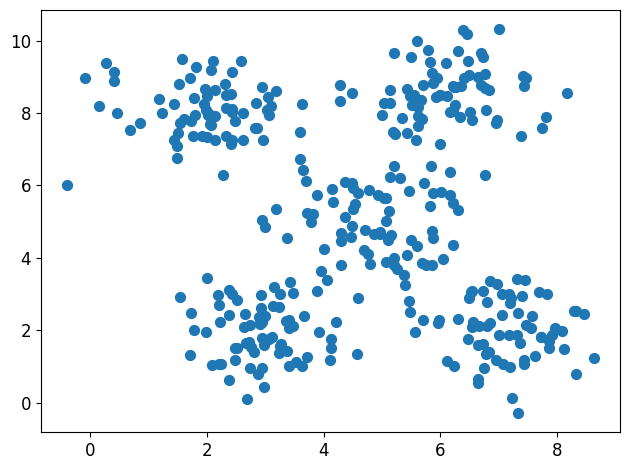

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=50);
save_fig("original_data")
plt.show()

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

The kmeans instance preserves a copy of the labels of the instances it was trained on, available via the "labels_" instance variable.The five centroids can be accessed with the "cluster_centers_" variable.

In [5]:
print("kmeans.labels_:")
print(kmeans.labels_)
print("kmeans.cluster_centers_:")
print(kmeans.cluster_centers_)

# Check the value of y_kmeans here and what observation do you get? 
print(y_kmeans)
for i, (label, y_kmean) in enumerate(zip(kmeans.labels_, y_kmeans)):
    print(f"Sample {i}: Label {label}, Predicted {y_kmean}, Match: {label == y_kmean}")


kmeans.labels_:
[1 0 4 3 2 1 0 4 4 2 1 0 4 3 2 1 0 4 3 2 1 0 4 1 4 1 0 4 3 2 1 0 4 3 2 1 0
 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3
 2 1 0 2 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1
 0 4 3 2 1 0 0 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4
 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2
 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0
 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3
 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 2 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1
 0 4 3 4 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4
 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2]
kmeans.cluster_centers_:
[[1.98385714 8.04942857]
 [2.97253521 1.97267606]
 [6.10842857 8.58428571]
 [7.09588235 2.01735294]
 [4.92605634 5.0184507 ]]
[1 0 4 3 2 1 0 4 4 2 1 0 4 3 2 1 0 4 3 2 1 0 4 1 4 1 0 4 3 2 1 0 4 3 2 1 0
 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 1 0 4 3 2 

Saving figure Kmeans_plot


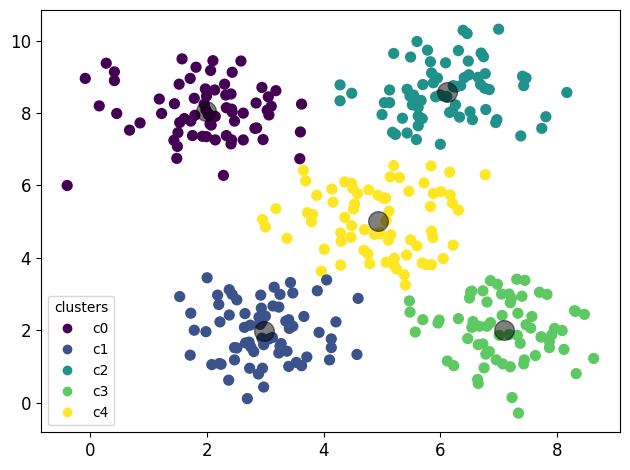

In [6]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
lb = ['c0', 'c1', 'c2', 'c3', 'c4']
plt.legend(handles=scatter.legend_elements()[0], labels = lb, title="clusters")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5);
save_fig("Kmeans_plot")
plt.show()

In [7]:
# Assign new instances to the cluster whose centroid is closest:
X_new = np.array([[0, 2], [3.5, 6], [5, 9.5], [7, 2.5]])
kmeans.predict(X_new)

# Check which cluster the following instances belong to?
# (-1, 0.5), (6.5, 4.5), (2.2, 8.5) 
# Sample output:
# [0,2] belongs to cluster 4
# [3.5, 6] belongs to cluster 0

# Write your code here

# New instances
new_instances = np.array([[-1, 0.5], [6.5, 4.5], [2.2, 8.5]])

# Predicting which cluster each instance belongs to
predicted_clusters = kmeans.predict(new_instances)

# Printing the predictions
for instance, cluster in zip(new_instances, predicted_clusters):
    print(f"The instance {instance} belongs to cluster {cluster}")

The instance [-1.   0.5] belongs to cluster 1
The instance [6.5 4.5] belongs to cluster 4
The instance [2.2 8.5] belongs to cluster 0


Saving figure user_Kmeans_plot


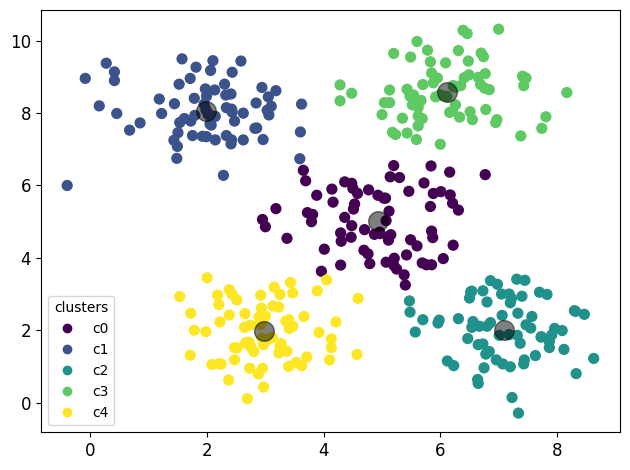

In [8]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=42):
    # Randomly choose the initial centroids
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) # axis = 0
                                for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 5)

scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
lb = ['c0', 'c1', 'c2', 'c3', 'c4']
plt.legend(handles=scatter.legend_elements()[0], labels = lb, title="clusters")

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

save_fig("user_Kmeans_plot")
plt.show()

In [9]:
# # Print the centroids found by the user defined KMeans function here and compare the results to the sklearn method. 

# Print centroids found by user-defined KMeans
print("Centroids found by user-defined KMeans:")
print(centers)

# Fit scikit-learn KMeans and get centroids
kmeans = KMeans(n_clusters=5, n_init=10).fit(X)

# Print centroids found by sklearn KMeans
print("\nCentroids found by sklearn KMeans:")
print(kmeans.cluster_centers_)

# Compare centroids
equal = np.allclose(centers, kmeans.cluster_centers_)
print("\nDo the centroids converge to the same values?", equal)


Centroids found by user-defined KMeans:
[[4.92605634 5.0184507 ]
 [1.98385714 8.04942857]
 [7.09588235 2.01735294]
 [6.10842857 8.58428571]
 [2.97253521 1.97267606]]

Centroids found by sklearn KMeans:
[[1.98385714 8.04942857]
 [4.92605634 5.0184507 ]
 [6.10842857 8.58428571]
 [7.09588235 2.01735294]
 [2.97253521 1.97267606]]

Do the centroids converge to the same values? False


Although the algorithm is guaranteed to converge, it may not converge to the right solution.

Saving figure local_optimum_plot


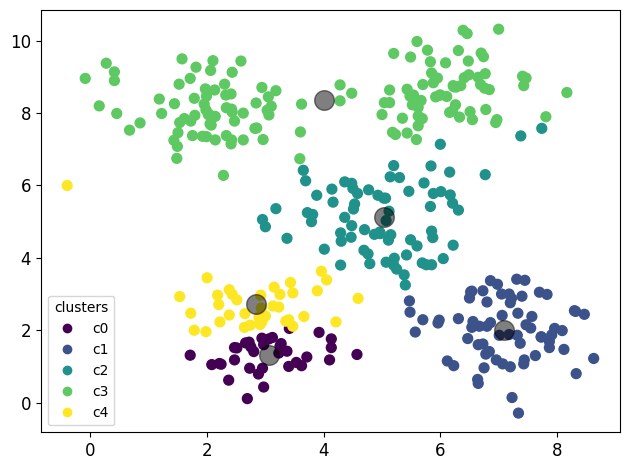

In [10]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # Randomly choose the initial centroids
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) # axis = 0
                                for i in range(n_clusters)])
        
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 5)

scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
lb = ['c0', 'c1', 'c2', 'c3', 'c4']
plt.legend(handles=scatter.legend_elements()[0], labels = lb, title="clusters")

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
save_fig("local_optimum_plot")
plt.show()

## Centroid initialization methods
1. If you happen to know approximately where the centroids should be (e.g., if you ran another clustering algorithm earlier), then you can set the init hyperparameter to a NumPy array containing the list of centroids, and set n_init to 1:
```python
good_init = np.array([[5, 5], [2, 8], [7, 2], [6, 9], [3, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
```
2. Another solution is to run the algorithm multiple times with different random initializations and keep the best solution. The number of random initializations is controlled by the n_init hyperparameter: by default, it is equal to 10. The performance can be evaluated by the metric "inertia" (cost). Inertia is the sum of the squared distances between each training instance and its closest centroid. The KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia.
3. K-Means++ algorithm: It introduced a smarter initialization step that tends to select centroids that are distant from one another, and this improvement makes the K-Means algorithm much less likely to converge to a suboptimal solution. To set the initialization to K-Means++, simply set init="k-means++" (this is actually the default).

In [11]:
# The inertia and score values of the above model
print("inertia:" +str(kmeans.inertia_))
# The score() method returns the negative inertia. 
# A predictor's score() method must always respect the "_greater is better_" rule.
print("score:" +str(kmeans.score(X)))

inertia:433.80300829447276
score:-433.8030082944727


### Mini-Batch K-Means
Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batches. Mini-batch K-Means is much faster than regular K-Means. However, its performance is often lower (higher inertia), and it keeps degrading as k increases.

In [12]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, n_init=3)
minibatch_kmeans.fit(X)
minibatch_kmeans.inertia_

434.47749294233125

### Finding the optimal number of clusters
What if the number of clusters was set to a lower or greater value than 5?

Saving figure bad_n_clusters_plot


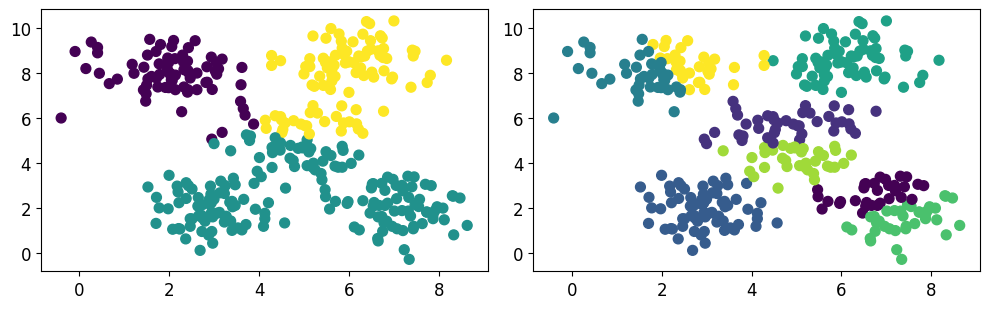

In [13]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_k3.fit(X)
y_kmeans_k3 = kmeans_k3.predict(X)

kmeans_k8 = KMeans(n_clusters=8, random_state=42, n_init=10)
kmeans_k8.fit(X)
y_kmeans_k8 = kmeans_k8.predict(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_k3, s=50, cmap='viridis')

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_k8, s=50, cmap='viridis')
save_fig("bad_n_clusters_plot")
plt.show()

In [14]:
# Check the inertia values
print("cluster = 3 -- " + str(kmeans_k3.inertia_))
print("cluster = 8 -- " + str(kmeans_k8.inertia_))

cluster = 3 -- 1334.7535407513806
cluster = 8 -- 328.0286412083186


We cannot simply take the value of K that minimizes the inertia, since it keeps getting lower as we increase K. However, we can plot the inertia as a function of K and analyze the resulting curve:

In [15]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure inertia_vs_K_plot


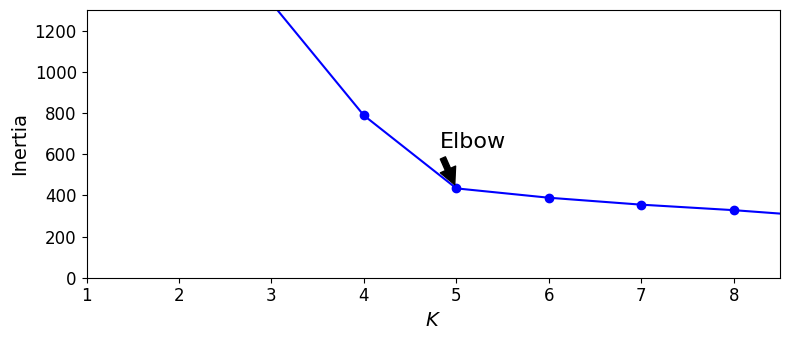

In [16]:
# The elbow method
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$K$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_K_plot")
plt.show()

As you can see, there is an elbow at $K=5$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $K=5$ is a pretty good choice. 

Another approach is to look at the _silhouette score_, which is the mean _silhouette coefficient_ over all the instances. An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the _mean intra-cluster distance_), and $b$ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Let's plot the silhouette score as a function of $K$:

In [17]:
from sklearn.metrics import silhouette_score
# Get the silhouette score for the current model
silhouette_score(X, kmeans.labels_)
# Get the silhouette score for different models with different K
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_plot


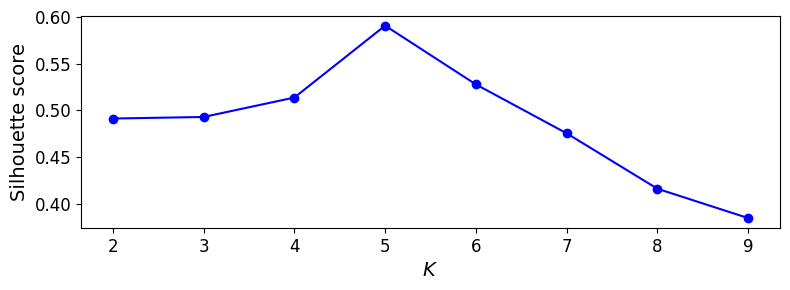

In [18]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$K$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
save_fig("silhouette_score_vs_k_plot")
plt.show()

### Using clustering for image segmentation
Image segmentation is the task of partitioning an image into multiple segments. We are going to do color segmentation here. We will simply assign pixels to the same segment if they have a similar color.

In [19]:
from matplotlib.image import imread
image = imread("flower.jpg")
image.shape

(667, 500, 3)

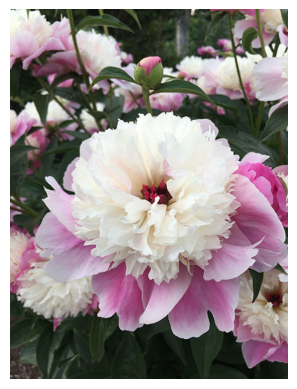

In [20]:
plt.imshow(image)
plt.axis('off')
plt.show()

The image is represented as a 3D array. The first dimension’s size is the height; the second is the width; and the third is the number of color channels, in this case red, green, and blue (RGB). In other words, for each pixel there is a 3D vector containing the intensities of red, green, and blue, each between 0 and 255. <br>
The following code reshapes the array to get a long list of RGB colors, then it clusters these colors using K-Means:

In [21]:
image = image/255.0 # convert to 0...1 scale
X = image.reshape(-1, 3)
X.shape

(333500, 3)

In [22]:
kmeans = KMeans(n_clusters = 16, n_init=10)
kmeans.fit(X)
new_colors = kmeans.cluster_centers_[kmeans.predict(X)]
new_colors = new_colors.reshape(image.shape)
%timeit kmeans.fit(X)

4.09 s ± 126 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
# Use Mini-Batch K-Means to solve the same problem.
# Write your code here
# Create a Mini-Batch K-Means model
minibatch_kmeans = MiniBatchKMeans(n_clusters=16, batch_size=200, n_init=10)
minibatch_kmeans.fit(X)
new_colors_minibatch = minibatch_kmeans.cluster_centers_[minibatch_kmeans.predict(X)]
new_colors_minibatch = new_colors_minibatch.reshape(image.shape)
%timeit minibatch_kmeans.fit(X)

69 ms ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Saving figure image_segmentation_diagram


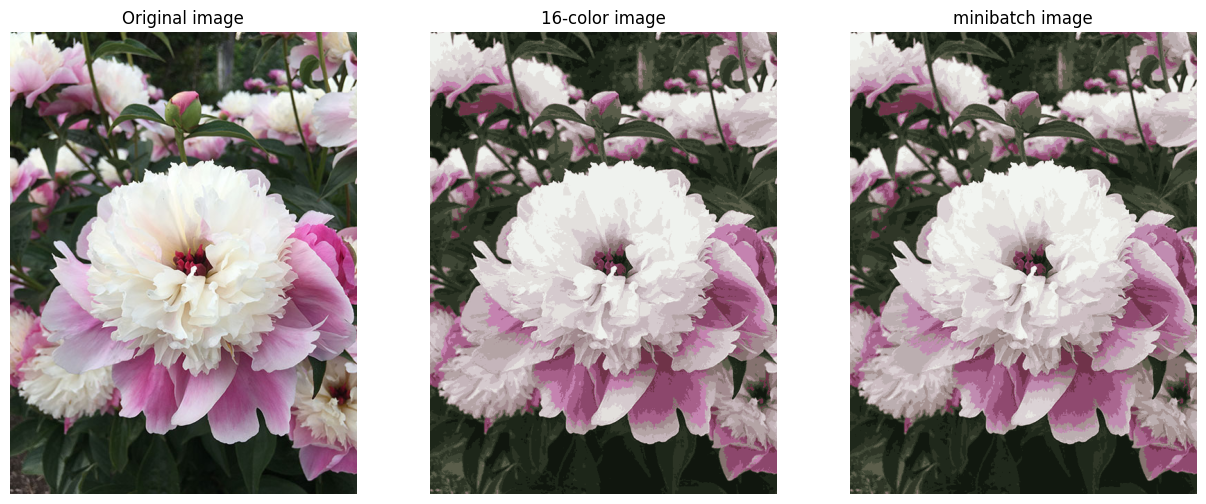

In [24]:
plt.figure(figsize=(16,6))
plt.subplots_adjust(wspace=0.05)
plt.subplot(131)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

plt.subplot(132)
plt.imshow(new_colors)
plt.title("16-color image")
plt.axis('off')

plt.subplot(133)
plt.imshow(new_colors_minibatch)
plt.title("minibatch image")
plt.axis('off')

save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

## Run the program and complete the following exercises. (20 points)
1.  For the "lab06_data.txt" KMeans example:
    1. (2 points) check the value of "y_kmeans". Comparing to the model variables, What observation do you get?  
    2. (3 points) Check which cluster the following instances belong to? (-1, 0.5), (6.5, 4.5), (2.2, 8.5) 
    3. (2 points) Print the centroids found by the user defined KMeans algorithm. Comparing to the sklearn KMeans method result, do they converge to the same centroids? 
2. (3 points) When Kmeans algorithm does not converge to the right solution, what do you think it converges to? Analyze the reasons. (What does it depend on?)
3. (3 points) We cannot simply choose the value of K that minimizes the inertia, since it keeps getting lower as we increase K. Anylyze the reason.   
4. For the image segmentation example,  
    1. (2 points) Observe the data from the original picture and calulate possible color options in the original picture. 
    2. (1 points) What does the following statement do?<br>
     ```python X = image.reshape(-1, 3) ```
    3. (3 points) Use Mini-Batch K-Means to solve the same problem. Use "%timeit" function call to compare the time efficiency of the two algorithms.
5. (1 points) Create a new Markdown field at the end of this file and put your answers in this field. Submit this file to the Blackboard. 


## Answers
2. In a KMeans model the cluster each data point belongs to depends on the centroids of the clusters. The centroids are determined by the model when it is trained on data. For the points (-1, 0.5), (6.5, 4.5), and (2.2, 8.5), they would be assigned to the clusters whose centroids are nearest to them.
   Let's assume we have a trained KMeans model with three clusters having centroids at (0,0), (5,5), and (2,8). The point (-1, 0.5) would be closest to the centroid (0,0), so it would be assigned to the first cluster. The point (6.5, 4.5) would be nearest to the centroid (5,5), putting it in the second cluster. The point (2.2, 8.5) would be closest to (2,8), so it would go into the third cluster.
   These assignments are not fixed and can change with different initializations of the KMeans algorithm or changes in the dataset. Each time the model is trained, the positions of centroids can shift, leading to different cluster assignments for the points. To get more consistent results, techniques like KMeans++ initialization or running the model multiple times and choosing the best result can be helpful.

3. Choosing the right number of clusters in KMeans is tricky. Although lower inertia, the sum of squared distances between points and their cluster centers, is often better, it's not always the case. Increasing the number of clusters makes inertia lower, but it doesn’t always mean better clustering. Too many clusters can over-complicate the model, leading to overfitting. It starts capturing noise rather than underlying patterns, making the model too specific and less useful. On the flip side, too few clusters can overlook important details. So, a balance is needed. We want clusters that are detailed enough to be useful but not so detailed that they become complex and hard to interpret. Techniques like the Elbow Method are helpful to find this balance, ensuring the clusters are meaningful without being overly complex.

4.
- In an RGB image, every pixel can take on a specific number of distinct shades for each of the red, green, and blue channels, resulting in a substantial total of unique potential colors per pixel. Moreover, considering the total pixel count in the image, there's a significant amount of data points, each capable of holding one of the many distinct color values that is in a RGB pixel with 256 levels per channnel would be ${256^3 = 16777216}$, which means the contribution to the image's overall color diversity and complexity.
  
- The function reshape(-1, 3) converts the 2D grid of pixels, each containing RGB values, into a linear array where each element represents a color value of a specific pixel, simplifying data handling.

- The first algorithm, presumably Standard KMeans, took around "4.1 seconds per loop" to execute.
The second algorithm, presumably Mini-Batch KMeans, took "68 milliseconds per loop" to execute.
So, Mini-Batch KMeans is many times faster than the standard KMeans in this particular instance.
